Edits:
- I've made a bunch of small edits improving the links to documentation and such.
- I clarified that you don't need to be writing your own algorithm to generate these networks.
- I added some images to help demonstrate the construction of Configuration Model Networks, and to help demonstrate the "size biasing" effect.
- updated the `plt.hist` calls to use the correct arguments if the version of matplotlib is older or newer.

# Random Graphs



So far we have looked at the PageRank algorithm.  The premise of PageRank and similar algorithms is that the structure of the network contains valuable information which the random surfer concept gives us access to.

We're going to shift gears soon and look at other processes that happen on networks.  For these processes, we are going to hypothesize that what happens isn't strongly dependent on finer details of the global structure.  We are going to look at how much of these various processes can be explained by what happens on random networks.

The underlying philosophy is that there may be some real-world emergent behavior we want to explain, and that the emergent behavior is robust for a large class of networks.  We are going to try to generate the simplest networks for which this emergent behavior exists.

So we start with very simple networks.

Networkx provides methods to produce each of these network classes, so **I am not asking you to** write code to produce these networks.  I am however going to give slowly decreasing amounts of guidance on how to use the networkx commands to generate and analyze these graphs.  The purpose of this is to get you practice finding commands and instructions on how to use them.

## The Erdős–Rényi network model

In 1959 **Edgar Gilbert** introduced a network model for which there are $N$ nodes, and each pair of nodes has an edge with probability $p$.  This model is usually called the Erdős–Rényi network model.  It is sometimes referred to as $G(N,p)$.  

That same year, Erdős and Rényi introduced a similar model for which there are $N$ nodes, and $m$ edges are added randomly to the network.  This is sometimes called the Erdős–Rényi network model  It is usually referred to as $G(N,m)$.

We'll study $G(N,p)$, but we will also call it the Erdős–Rényi network model.  Here is sample code that will generate these, but networkx has better algorithms built in that you should use.

In [ ]:
import networkx as nx
def my_ER_graph(N, p):
    nodelist = list(range(N))
    G = nx.Graph()
    G.add_nodes_from(nodelist)
    for node in nodelist:
        for potential_neighbor in range(node+1, N):
            if random.random()<p:
                G.add_edge(node, potential_neighbor)
    return G

Networkx has several commands to generate these graphs.  The methods are a bit more sophisticated than the above:

In [1]:
import networkx as nx
N = 1000  #number of nodes
p = 2/N   #edge probability

G1 = nx.gnp_random_graph(N, p)
G2 = nx.erdos_renyi_graph(N,p)
G3 = nx.binomial_graph(N,p)
G4 = nx.fast_gnp_random_graph(N,p)


The implementation of the first three are (effectively) identical, and only exist because the graph is referred to by different names.  The fourth algorithm is much faster for cases in which $Np \ll N^2$ (which is often true).

Basically the first three look at each pair of nodes in the network and decide whether or not the pair will have an edge.  The number of steps these algorithms take are therefore proportional to the number of potential pairs in the population.  There are $\binom{N}{2} = N(N-1)/2$ of these [think about why this should be true].  So if we increase $N$ by a factor of $10$, we are increasing the run time by a factor of about $100$.


In contrast `nx.fast_gnp_random_graph` basically treats the pairs as ordered and does a single calculation to determine which pair will have the next edge.  It then gives that pair an edge and decides which will be the next pair.  So the run time is roughly proportional to the number of edges.  In this case, assuming that we keep the average degree the same, when we increase the number of nodes by a factor of $10$, the number of edges increases by about a factor of $10$.  So the run time only increases by a factor of $10$.  This makes a significant difference.


### Properties of Erdős–Rényi networks

The expected degree of a node in an Erdős–Rényi network is $p(N-1)$.  This is $p$ times the number of potential neighbors.

This means that if we want to keep the same average degree, but let $N$ grow, we must decrease $p$.

##### Exercises with Erdős–Rényi networks

###### 1

[Sample code that does most of these steps is below.]

Use one of the networkx commands to generate Erdős–Rényi networks for many different numbers of nodes $N$ and edge probabilities $p$.  Specifically, take

- $N = 2^a$ for $a$ in `range(8,17)`
- $p = k/N$ for $k$ in `k_list`, where `k_list = [0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 2, 4, 6]`

For each network, find the size of the largest component.  To do this, use:

`largest_component_size = max([len(CC) for CC in nx.connected_components(G)])`
[I used a different version in the earlier notes because I was trying to avoid things like list comprehensions, which is what is inside the `max` command.  The version I used was deprecated in 2.4 so it didn't work for some of you, and I've added list comprehension to the tutorial so I'm happier to do it this way now]

For each $N$, create a list, `proportion_list` such that each entry of `proportion_list` gives `largest_component_size/N` for the corresponding `k` in `k_list`.

Comment on the outcome.  [focus on what happens near $k=1$]




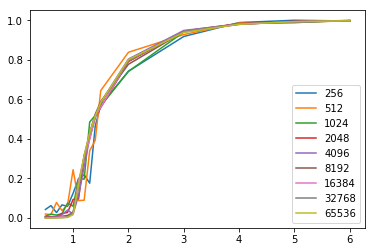

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

k_list = [0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 2, 3, 4, 5, 6]
for a in range(8, 17):
    N = 2**a
    proportion_list = []
    for k in k_list:
        G = nx.fast_gnp_random_graph(N, k/N)
        largest_component_size = max([len(CC) for CC in nx.connected_components(G)])
        proportion_list.append(largest_component_size/N)
    plt.plot(k_list, proportion_list, label = N)
plt.legend()
plt.show()

For large `N`, when `k` crosses 1, the sizes suddenly go from effectively 0 to positive values.

###### 2

For the same values of $N$ as above, take $p = 2/N$.  

Generate Erdős–Rényi networks for each $N$ with that $p$.

You can use `Degs = [G.degree(node) for node in G.nodes()]` to create a list of degrees for the nodes in `G`.

Use `plt.hist`  https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html
to plot a histogram of the degrees for each $N$.  Set the optional arguments:
- `bins = range(10)` 
- `histtype = 'step'`
- `density = True` #this tells it to normalize.  
Depending on python version, this may give an error in which case you should set `normed=True` rather than `density=True` which is used in older versions

Argue that a node's degree comes from a binomial distribution with N-1 and p.  [use Wikipedia or other source to see what a binomial distribution is if you are unfamiliar with it]

Argue that as $N$ goes to infinity with $p=2/N$, the distribution of degrees should approach a Poisson with mean $2$.  [use Wikipedia or other source to see how a binomial distribution approaches a Poisson distribution]

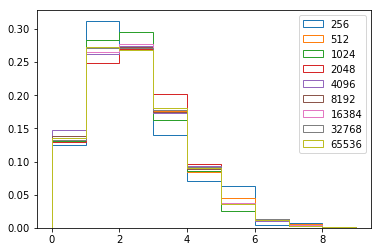

In [2]:
import matplotlib                          #these 2 imports are
from distutils.version import LooseVersion #used to check 
                                           #matplotlib version


plt.clf()

for a in range(8, 17):
    N = 2**a
    p = 2/N
    G = nx.fast_gnp_random_graph(N, p)
    Degs = [G.degree(node) for node in G.nodes()]
    if LooseVersion(matplotlib.__version__) >=  LooseVersion("2.1"):  
        plt.hist(Degs, bins = range(10), density = True, histtype='step', label = '{}'.format(N))
    else:
        plt.hist(Degs, bins = range(10), normed = True, histtype='step', label = '{}'.format(N))
plt.legend(loc = 'upper right')
plt.show()

- For a given $N$, a node has $N-1$ potential neighbors, each existing with probability $p$.  This is the definition of a binomial distribution.
- If $N \to \infty$, while $p N$ remains fixed, the distribution is effectively the same as if $p(N-1)$ remains fixed.  The binomial distribution tends to a Poisson distribution if the number of trials increases, but the average remains constant.

##### 3

Take $p=5/N$.  Generate an Erdős–Rényi network for $N$ nodes where $N = 2^a$ for $a$ in `range(8,13)`.   

Find the largest connected component using the following:

`largest_component_nodes = max(nx.connected_components(G), key = len)`  
`LC = G.subgraph(largest_component_nodes)`



Use `nx.average_shortest_path_length(LC)` to find the average shortest path length between pairs of nodes in that component.  So this algorithm takes all pairs of nodes in the component, calculates the shortest path between them, and then takes the average over all pairs.

Plot this as a function of $N$.

Try $p = 0.5/N$, $0.9/N$, $1/N$, $1.1/N$, $2/N$, and $3/N$ as well.  Something interesting happens near an average degree of $1$, which you may have noticed already.

If the average degree is larger than $1$, comment on how the path length in the largest component depends on $N$. 


0.5
   256
   512
   1024
   2048
   4096
0.9
   256
   512
   1024
   2048
   4096
1
   256
   512
   1024
   2048
   4096
1.1
   256
   512
   1024
   2048
   4096
2
   256
   512
   1024
   2048
   4096
3
   256
   512
   1024
   2048
   4096
5
   256
   512
   1024
   2048
   4096


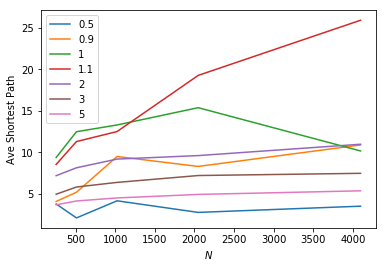

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

plt.clf()



for kave in [0.5, 0.9, 1, 1.1, 2, 3, 5]:
    print(kave)
    ave_shortest_path_lengths = []
    Ns = []
    for a in range(8, 13):
        N = 2**a
        print("  ",N)
        Ns.append(N)
        p = kave/N
        G = nx.fast_gnp_random_graph(N, p)
        largest_component_nodes = max(nx.connected_components(G), key = len) 
        LC = G.subgraph(largest_component_nodes)
        ave_shortest_path_lengths.append(nx.average_shortest_path_length(LC))
    
    plt.plot(Ns, ave_shortest_path_lengths, label = kave)
plt.xlabel('$N$')
plt.ylabel('Ave Shortest Path')
plt.legend()
plt.show()

There's a clear peak in the average path length around an average degree of 1.

For average degrees well above 1 the path length grows very slowly as the number of nodes increases.



##### 4

Without generating a network, assume $N$ and $p$ are given.  Consider a node $u$ with more than one neighbor.  Choose two of those neighbors $v$ and $w$.  What is the probability that $v$ and $w$ share an edge?

Now assume that the average degree is fixed and $N$ goes to infinity.  What happens to the probability that $v$ and $w$ share an edge?

What does this say about the density of triangles in large Erdős–Rényi networks, if the average degree is not large?

- The probability `v` and `w` share an edge is $p$.
- As $N \to \infty$, $p$ goes to 0.  So this probability goes to zero.
- The density of triangles must be low.  (in fact, the number of triangles turns out to be Poisson distributed, so the number remains about the same, even as the network gets arbitrarily large).

## The Watts-Strogatz "small-world" network

One of the most cited papers ever is "Collective dynamics of ‘small-world’ networks" by Watts and Strogatz.  It is available at https://www.nature.com/articles/30918.pdf [if you are logged in through La Trobe].

The network class is based on the observation that in many real networks, the paths between nodes are typically fairly short (like in an Erdős–Rényi network), but the number of triangles is rather large.

To generate a class of random networks with this property, they start with a ring of nodes, with each node connected to nearby nodes on the ring.  Then they rewire each edge with some probability $p$.

What they find is that there are a range of rewiring probabilities $p$ for which the network has relatively large clustering (frequency of triangles), but short typical path lengths.

![image](small_world_image.png)

In this image $\langle C\rangle_p$ is the clustering for a given value of $p$ and $\langle \ell \rangle_p$ is the average shortest path length.

#### Exercise

Look at the [Networkx Documentation](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html#networkx.generators.random_graphs.watts_strogatz_graph) on Watts-Strogatz graphs (`nx.watts_strogatz_graph`).  

Read over it and then use the algorithm to generate some networks for various parameter values.

Plot a histogram of the degrees (see matplotlib's [`hist`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html) command)

Calculate the clustering coefficients [use Google to find the networkx documentation on clustering coefficients, or a stackoverflow page describing how to do this].

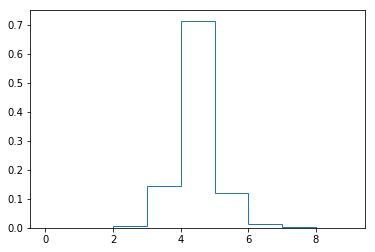

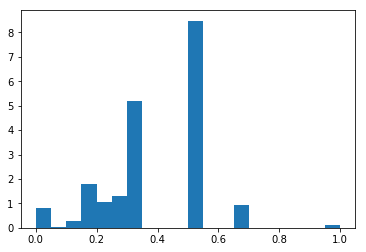

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib                          #these last 2 imports are
from distutils.version import LooseVersion #used to check 
                                           #matplotlib version

plt.clf()
G = nx.watts_strogatz_graph(1000, 5, 0.1)
Degs = [G.degree(node) for node in G.nodes()]
if LooseVersion(matplotlib.__version__) >=  LooseVersion("2.1"):  
    plt.hist(Degs, bins = range(10), density = True, histtype='step', label = '{}'.format(N))
else:
    plt.hist(Degs, bins = range(10), normed = True, histtype='step', label = '{}'.format(N))
plt.show()

plt.clf()
Clust = nx.clustering(G)
if LooseVersion(matplotlib.__version__) >=  LooseVersion("2.1"):  
    plt.hist(list(Clust.values()), bins = np.linspace(0,1, 21), density = True)
else:
    plt.hist(list(Clust.values()), bins = np.linspace(0,1, 21), normed = True)    
plt.show()


## The Barabasi-Albert network model

The networks we saw above all have relatively narrow degree distributions.  Many real-world networks seem to have a surprisingly large number of nodes with very high degree.

To generate a class of random graph with a much broader degree distribution, Laszlo Barabasi and Reka Albert came up with the Barabasi-Albert network model.

In this model: 
- we begin with a small graph, typically the initial graph has all possible edges.
- Then we add a node.  We give it $m$ new neighbors.  To do this, we select $m$ nodes from the already existing nodes, with probability proportional to their current degrees.

As a result, earlier nodes tend to have higher degree and the [Matthew effect](https://en.wikipedia.org/wiki/Matthew_effect) leads to their degrees growing quickly.

This is provided as a command in networkx.

##### Exercise

Generate a few networks using networkx's implementation of this approach.  Plot histograms of their degrees.






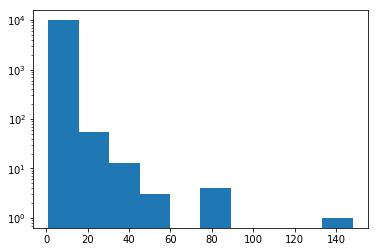

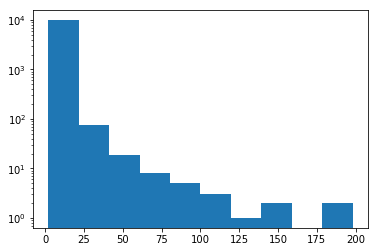

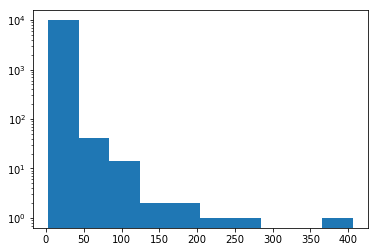

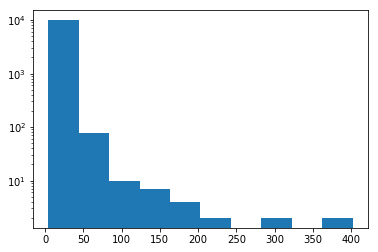

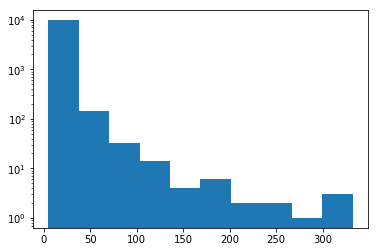

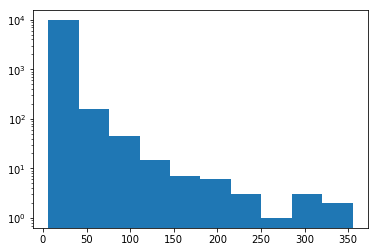

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

G= nx.barabasi_albert_graph(10000, 1)
Degs = [G.degree(node) for node in G.nodes()]
plt.hist(Degs, log=True)
plt.show()

G= nx.barabasi_albert_graph(10000, 2)
Degs = [G.degree(node) for node in G.nodes()]
plt.hist(Degs, log=True)
plt.show()

G= nx.barabasi_albert_graph(10000, 3)
Degs = [G.degree(node) for node in G.nodes()]
plt.hist(Degs, log=True)
plt.show()

G= nx.barabasi_albert_graph(10000, 4)
Degs = [G.degree(node) for node in G.nodes()]
plt.hist(Degs, log=True)
plt.show()

G= nx.barabasi_albert_graph(10000, 5)
Degs = [G.degree(node) for node in G.nodes()]
plt.hist(Degs, log=True)
plt.show()

G= nx.barabasi_albert_graph(10000, 6)
Degs = [G.degree(node) for node in G.nodes()]
plt.hist(Degs, log=True)
plt.show()



## Configuration Model networks

The final class of random network we will consider allows us to specify the degree sequence.  This is the Configuration Model network.

The way the algorithm works is that we assign each node a degree.  If node $u$ has $k_u$ as its degree, we give it $k_u$ "stubs", or half-edges.  We then start to select random pairs of half-edges, which we pair into edges.

The process is demonstrated here:

<img src="CM_generation.png" width="550"/>

Note: we may get self-edges and repeated-edges (so networkx's implementation returns a MultiGraph()).


#### Exercise

Create a large (say $N=1000000$ node) Configuration Model network with degrees `[3]*(N//2) + [1]*(N//2)`.  (also test what happens if you use `N/2` instead of `N//2` to see why I have two divide signs).

Choose 50 nodes at random and check their degrees.  You should get about half with degree 3 and half with degree 1.

Now choose 50 nodes at random, and for each of those nodes, choose a random neighbor.  Before checking, predict how many should have degree 3 and how many should have degree 1.  Check the degrees of the neighbors.

Use this to explain the title of the article: "Why your friends have more friends than you do": https://www.jstor.org/stable/2781907

Then check the clustering and average shortest path lengths for these networks.

Next, take varying values of $N$ and modify  the proportion of nodes with degree 3.  Plot the proportion of nodes that are in the largest component as a function of the proportion of nodes with degree $3$.  Can you say why the transition is where it is?

**Soln**

This problem is effectively one of the assignment questions, so I'm not going to write up a full response here.

We can demonstrate the principles of the exercise above in the following.  Consider the three figures below.  
- We start by showing the nodes of the network.  
- Then we show the network with stubs, where half of the nodes have degree $1$ and half degree $3$.
- Finally we show the fully connected network.

Please do the following steps several times:
- Look at the first figure and select one of the nodes.  
- Then look at that node in the figure with stubs.  Since half of them have $3$ and half $1$, you should get $3$ half of the time.
- Then go to the next figure where the stubs are joined, but still focus on that node.  Without looking at the neighbors, choose one of the edges from your node and follow it to the neighbor.  Check the degree of the neighbor.  You should see that you reach degree $3$ nodes more often than degree $1$.  (how much more often?)

<img src="CM_generationneg1.png" width="300"/>

<img src="CM_generation0.png" width="300"/>

<img src="final_circle.png" width="300"/>

